In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data from excel file to pandas
df=pd.read_csv("C:/Users/Dell/Desktop/avocado.csv")
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [3]:
df=pd.read_csv("C:/Users/Dell/Desktop/avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Dataset Attributes

Input variables:Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Output variables:  region & average price

# EDA of Dataset

In [4]:
df.shape

(18249, 14)

In [5]:
#Checking the datatype of each attribute
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As per problem statement Target variable i.e. AveragePrice is float64 i.e. continuous value so we'll use Regression to learn our model

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#To check null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Statistical Summary

In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Visualization

<AxesSubplot:>

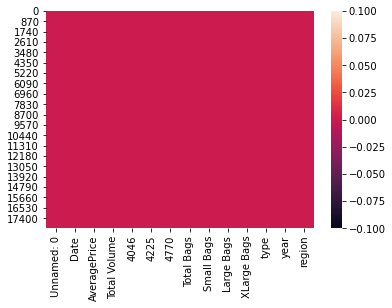

In [11]:
#to check missing values in data set via heat map
sns.heatmap(df.isnull())

In [13]:
#Exploring the data variable
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

min value is 0.44 & max value is 3.17 in the dataset

In [14]:
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

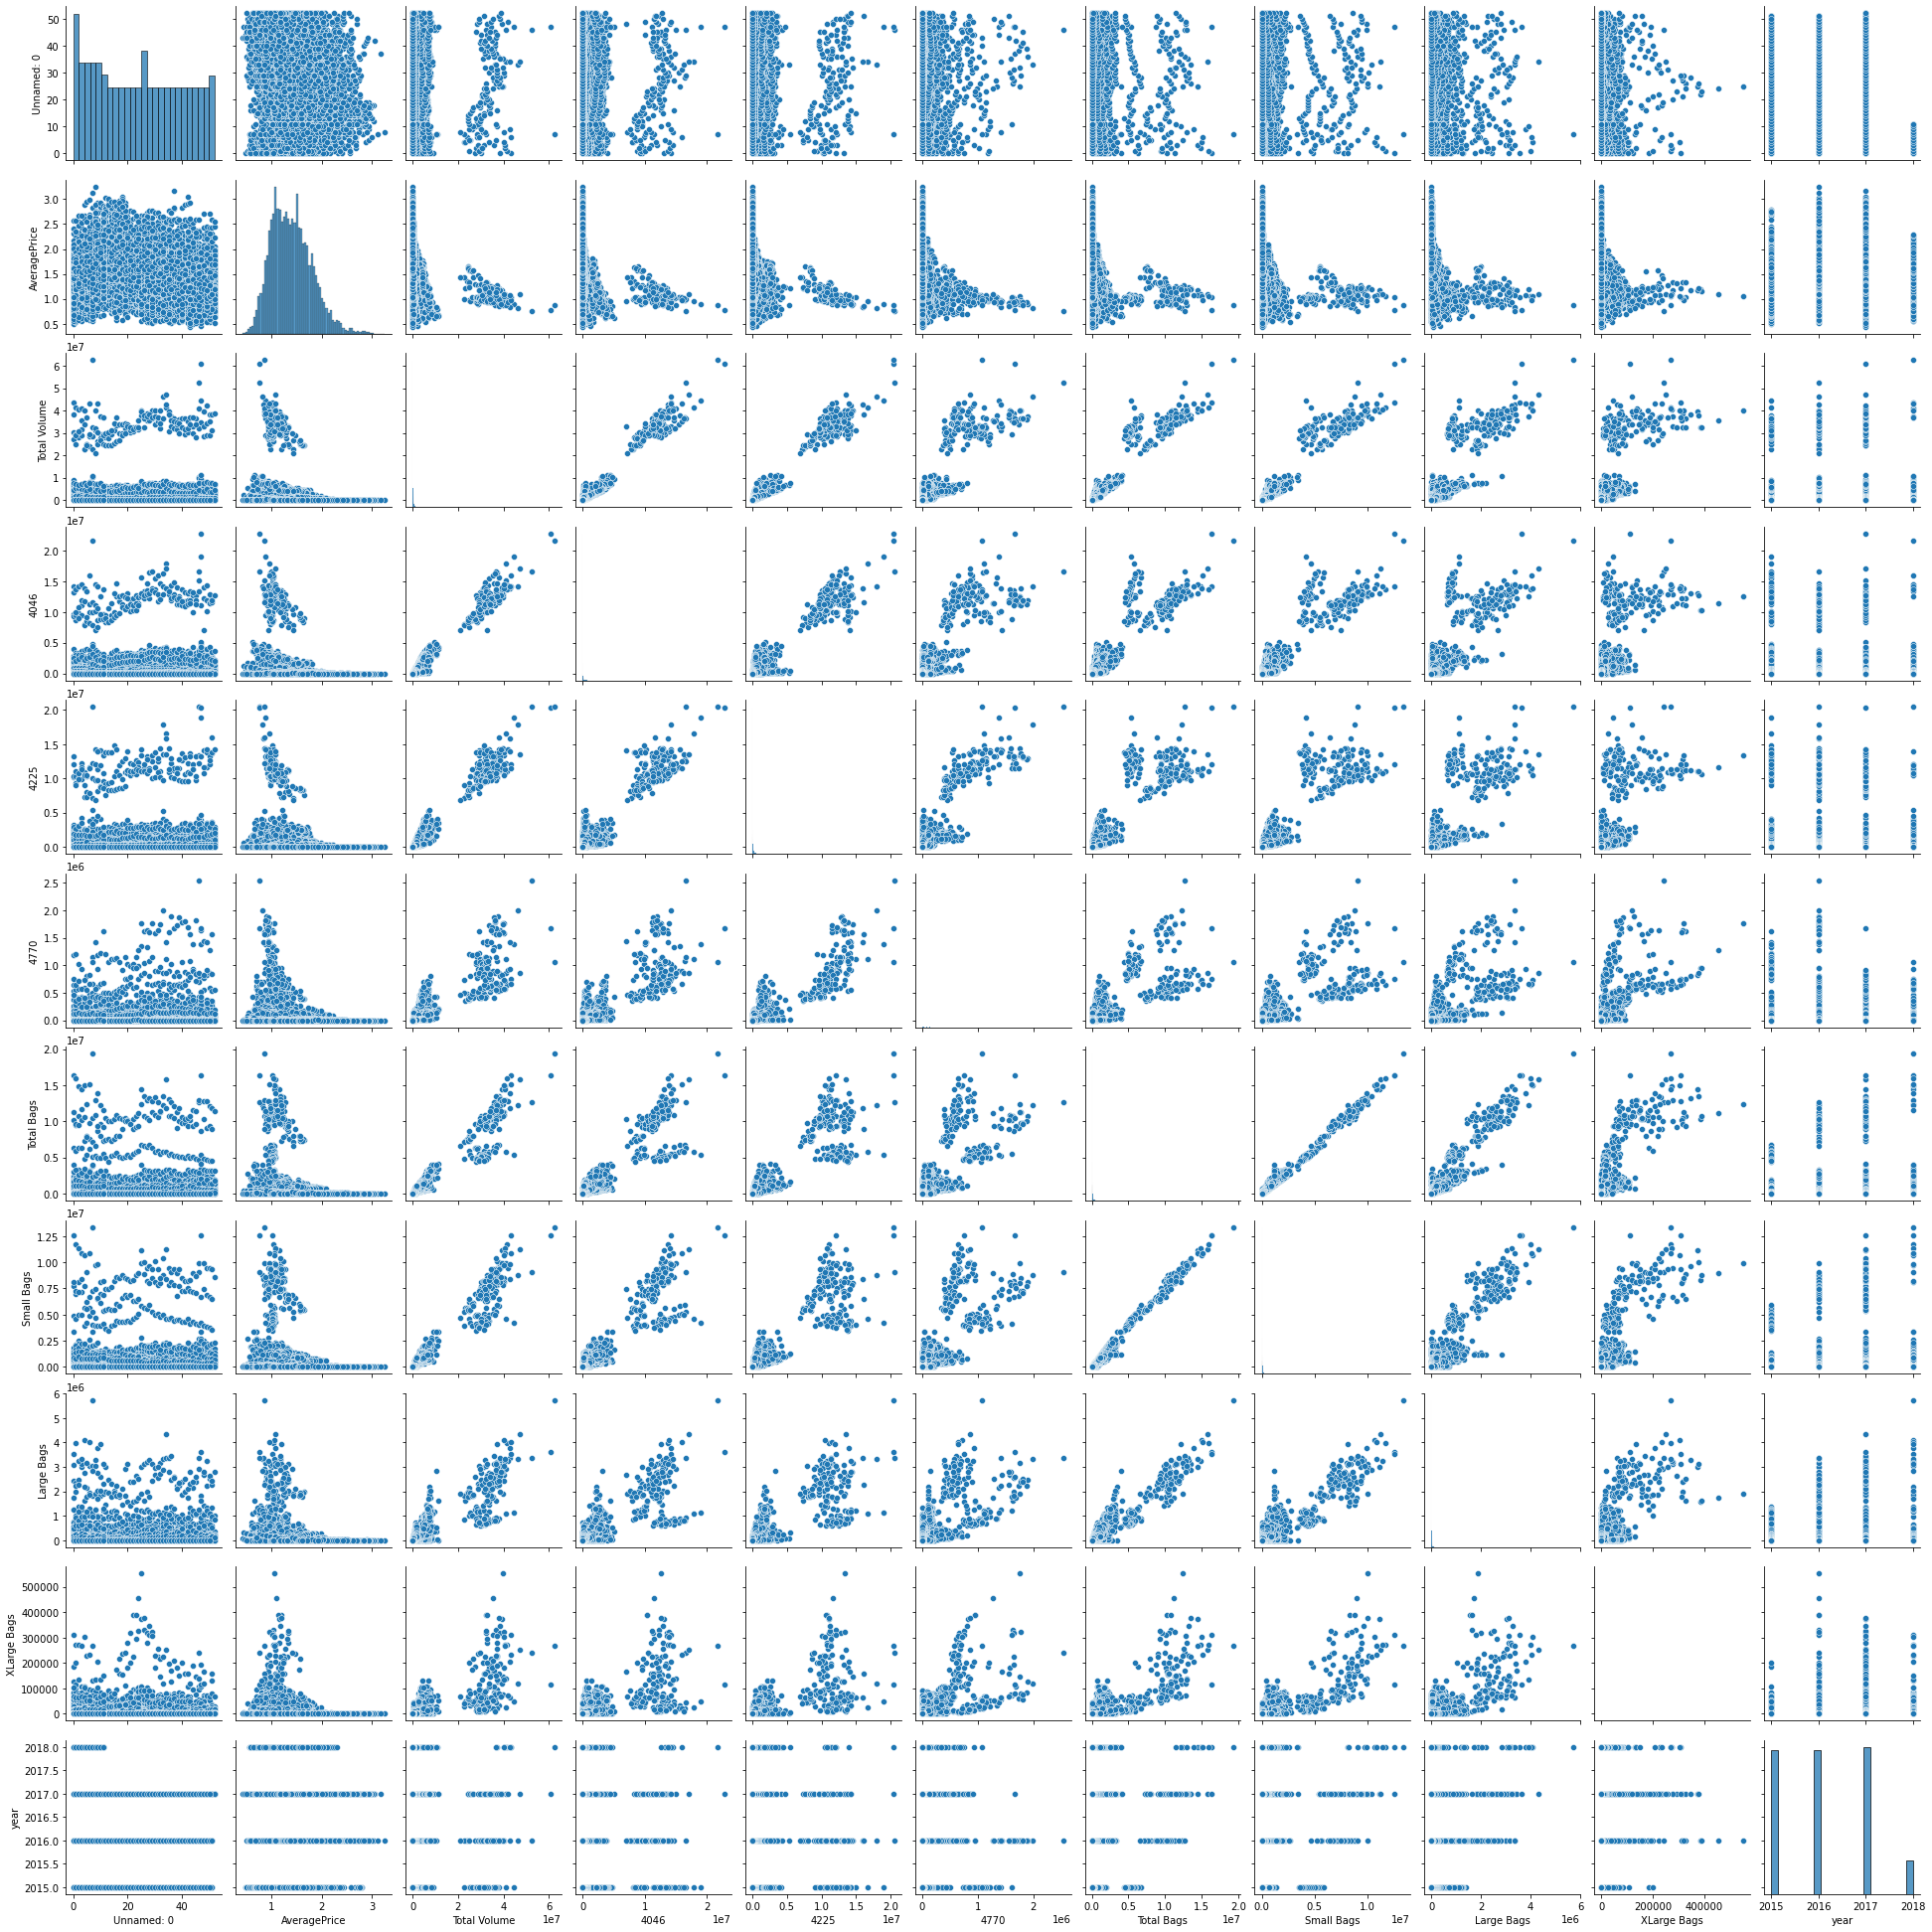

In [15]:
#to check distribution of single variables and relationships between two variables
sns.pairplot(df)

Total number of Regions are =  54


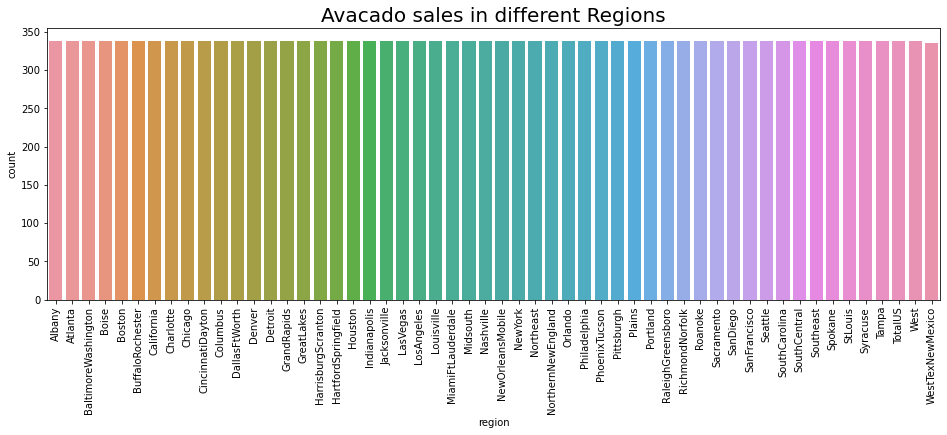

In [16]:
# univariate analysis
print("Total number of Regions are = ",len(df['region'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="region", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Avacado sales in different Regions", fontsize = 20)
plt.show()

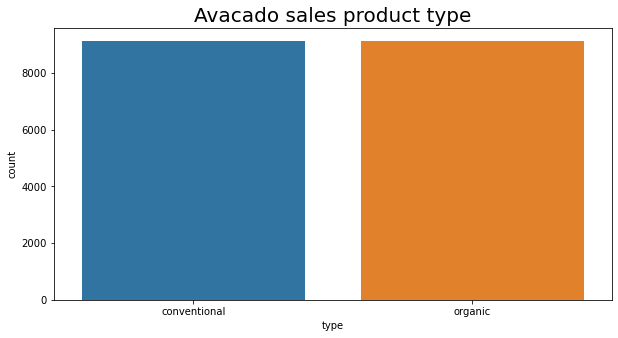

In [17]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="type", data=df)
plt.title("Avacado sales product type", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

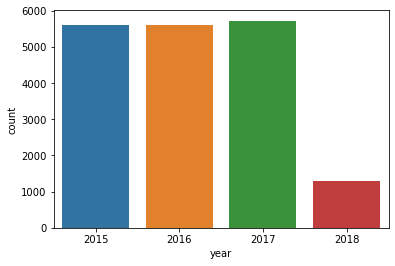

In [18]:
sns.countplot(x='year', data=df)

sale is more in 2017 & less in 2018

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

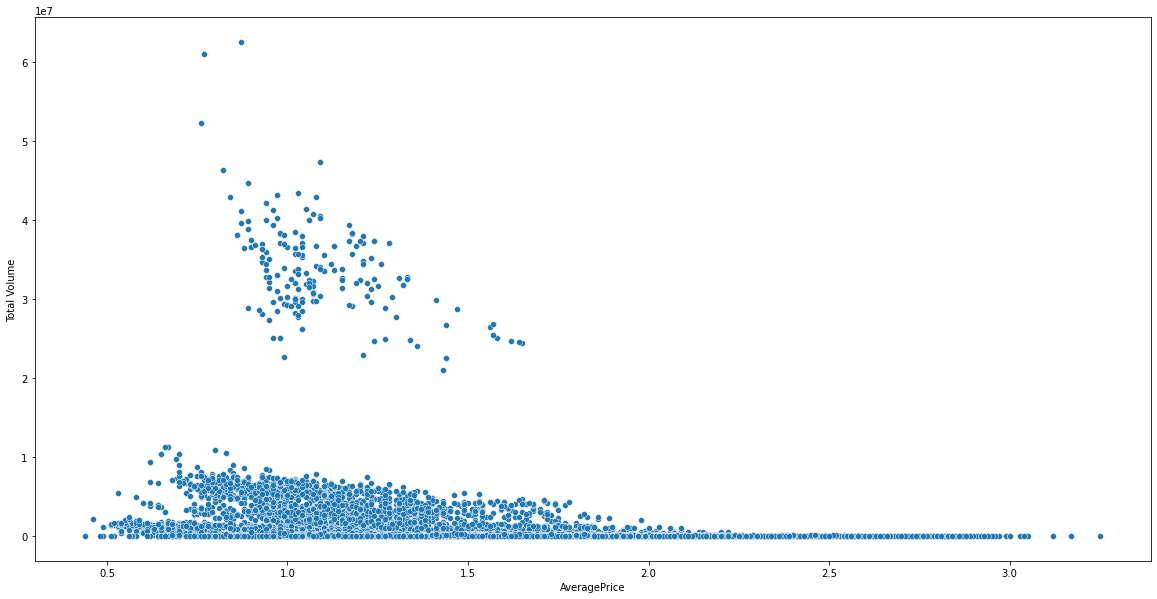

In [19]:
#Bivariate Analysis
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Volume', data = df)

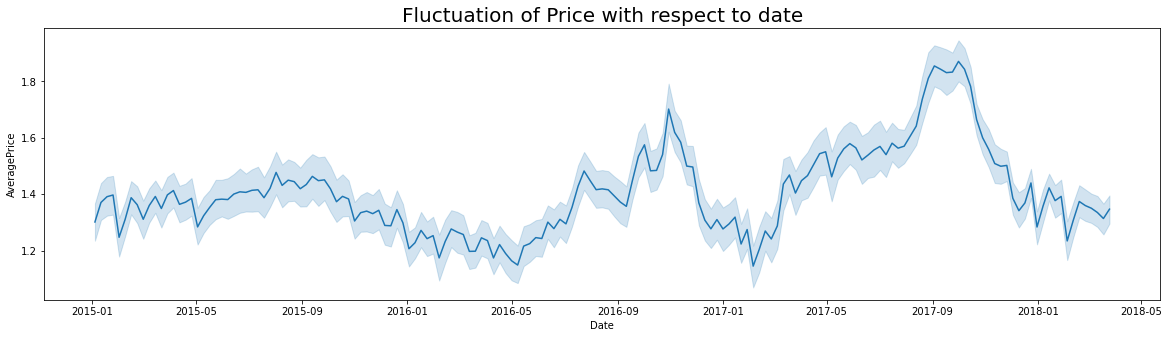

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="AveragePrice",  data=df)
plt.title("Fluctuation of Price with respect to date", fontsize = 20)
plt.show()

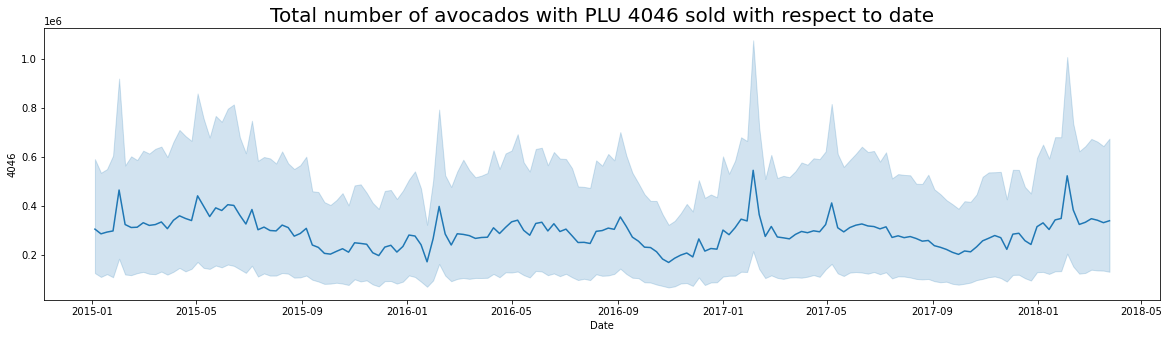

In [21]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4046",  data=df)
plt.title("Total number of avocados with PLU 4046 sold with respect to date", fontsize = 20)
plt.show()

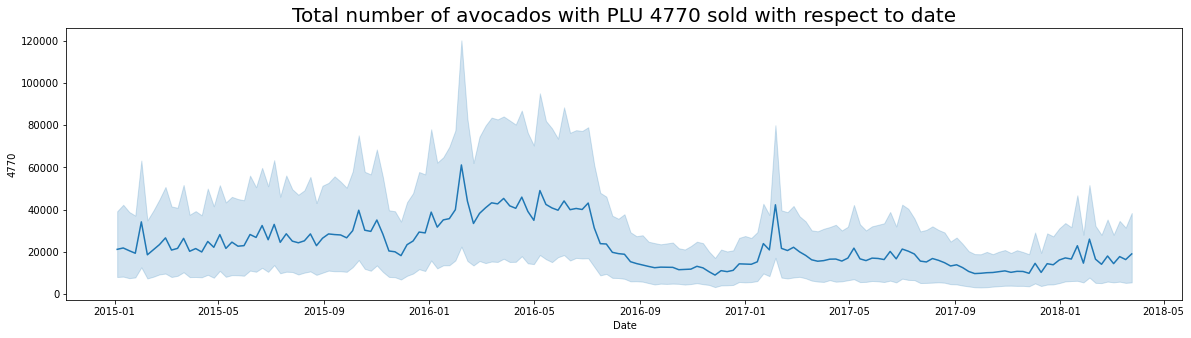

In [32]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x="Date",y="4770",  data=df)
plt.title("Total number of avocados with PLU 4770 sold with respect to date", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

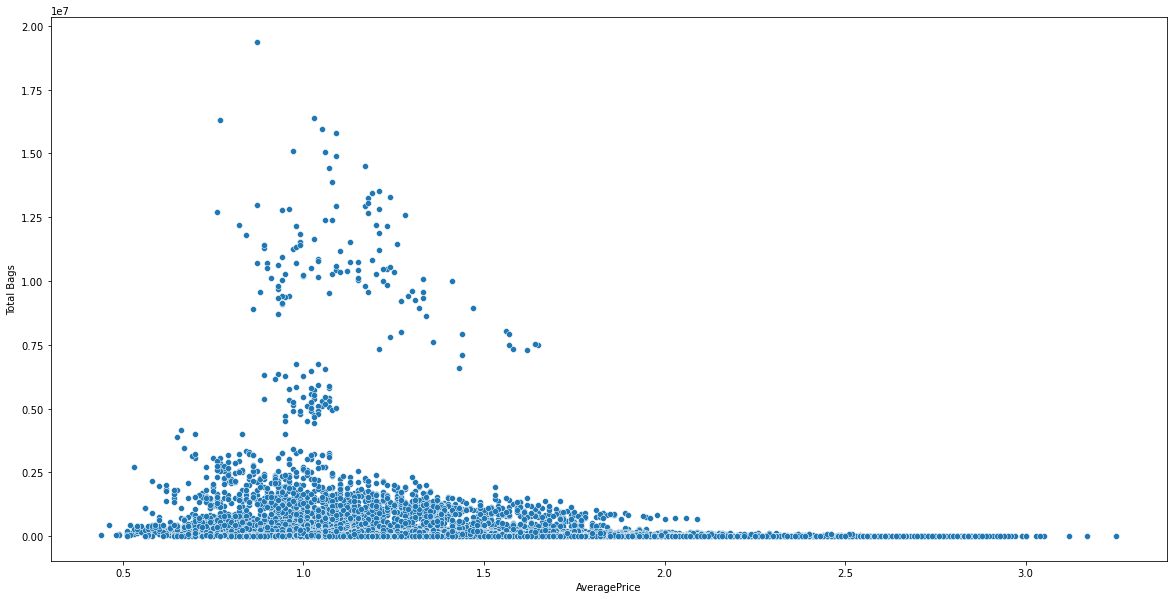

In [22]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Bags', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='4046'>

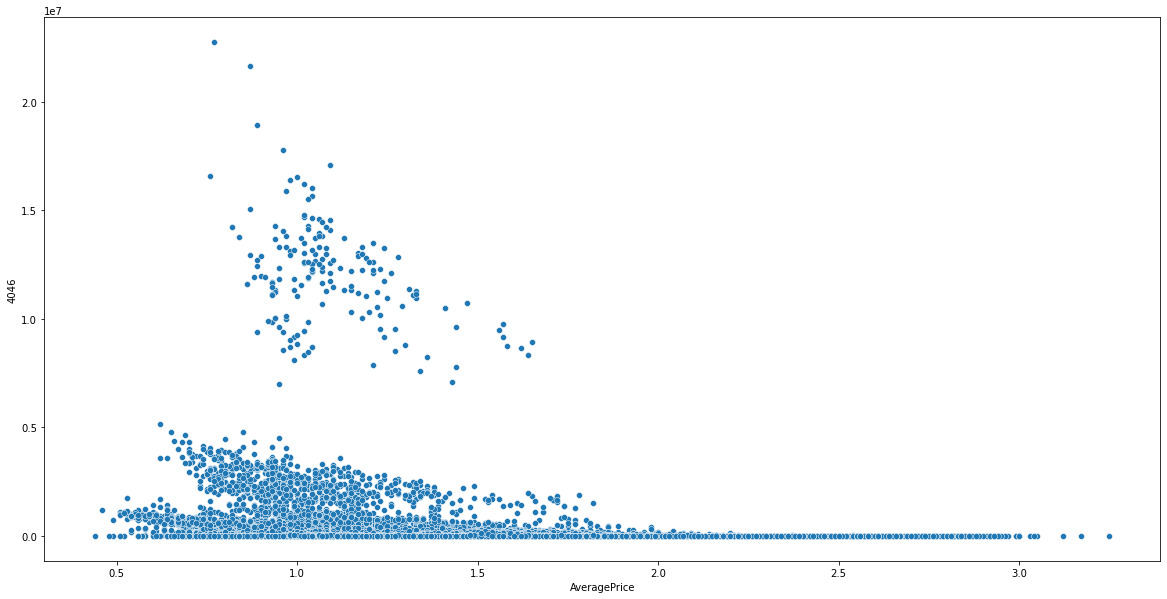

In [34]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4046', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='4225'>

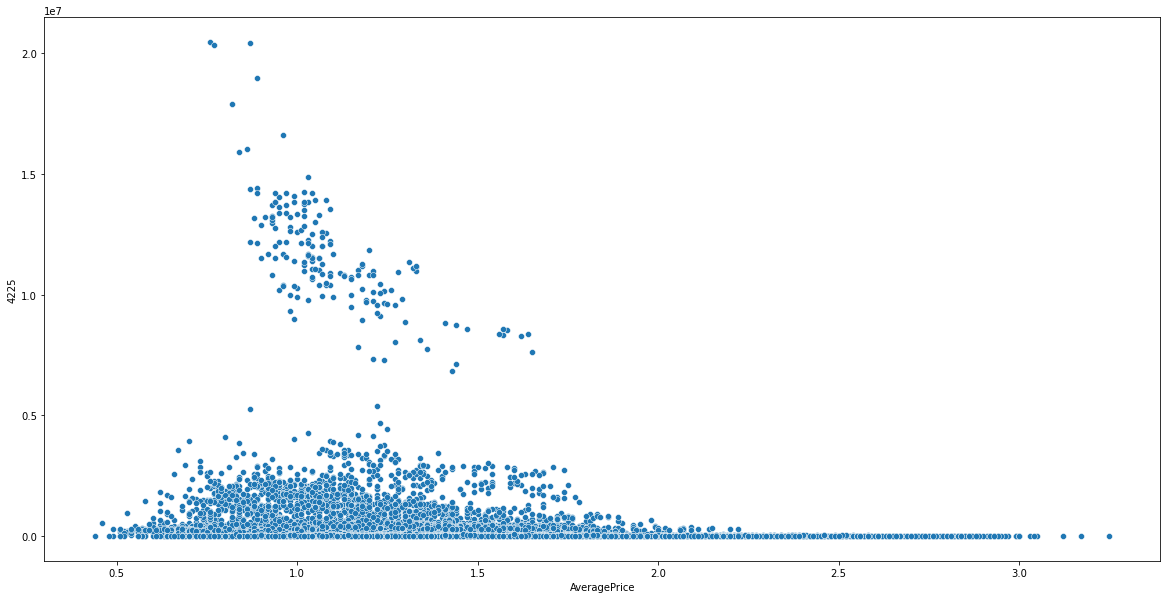

In [23]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4225', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='4770'>

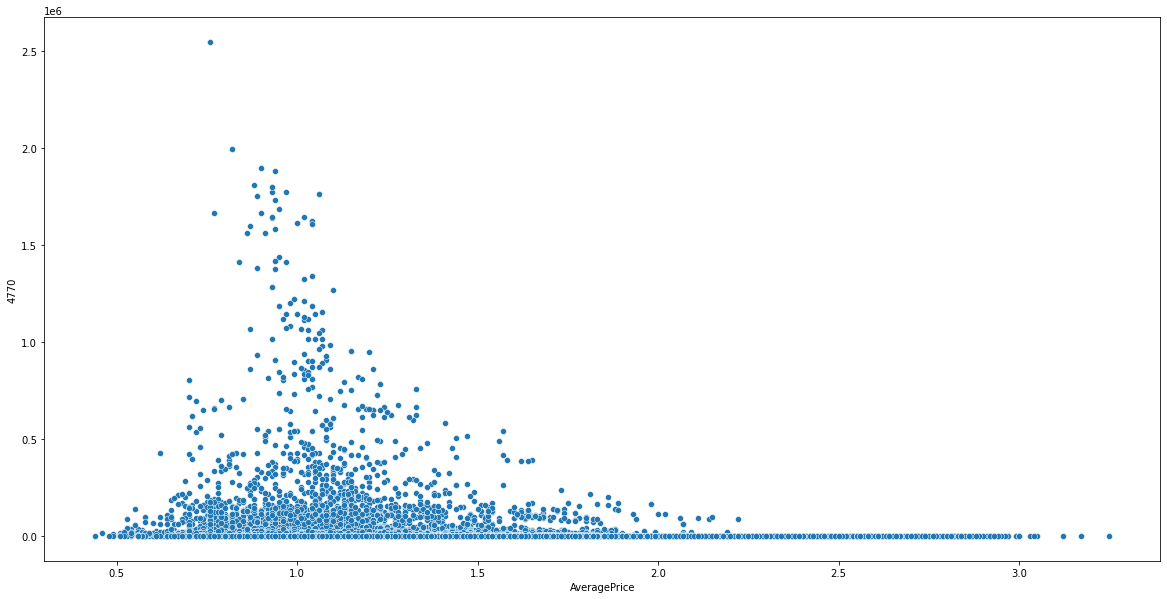

In [36]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = '4770', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Small Bags'>

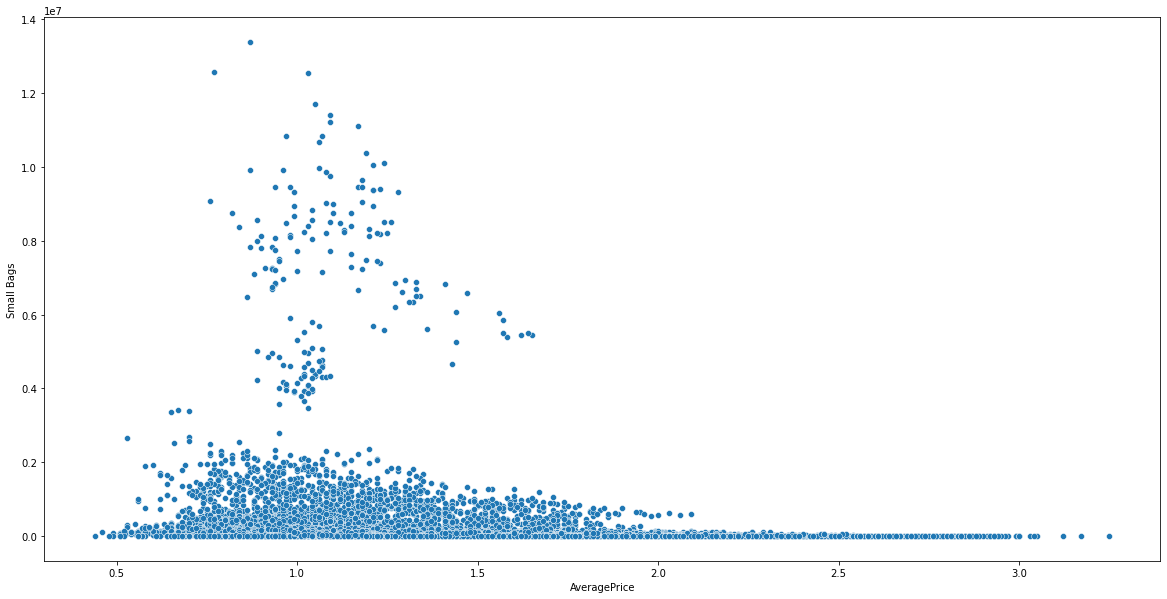

In [24]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Small Bags', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='Large Bags'>

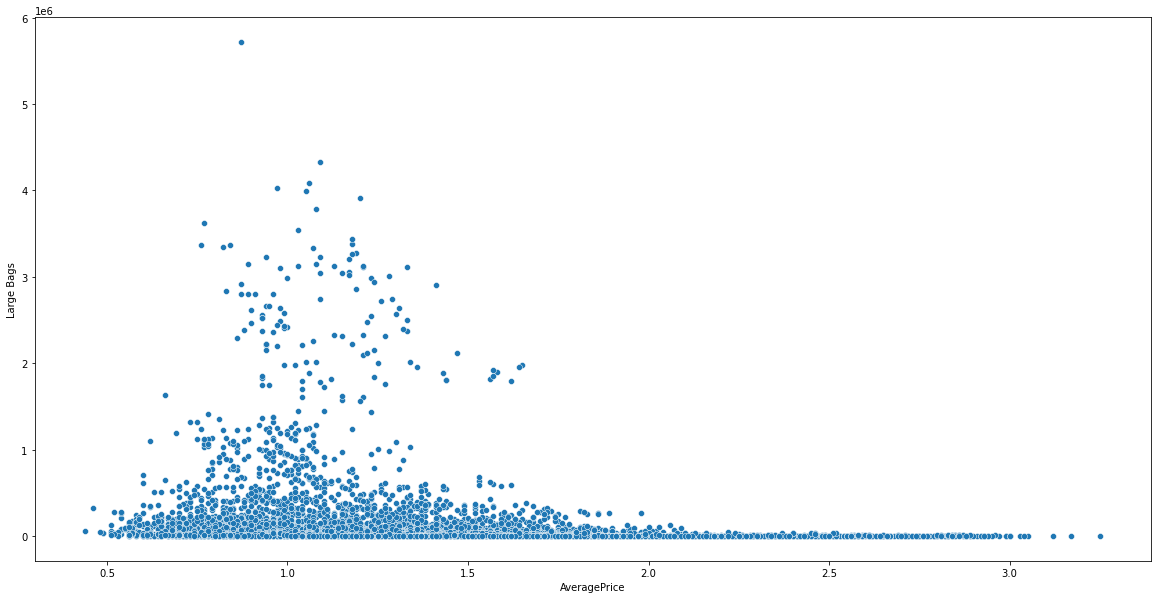

In [38]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Large Bags', data = df)

<AxesSubplot:xlabel='AveragePrice', ylabel='XLarge Bags'>

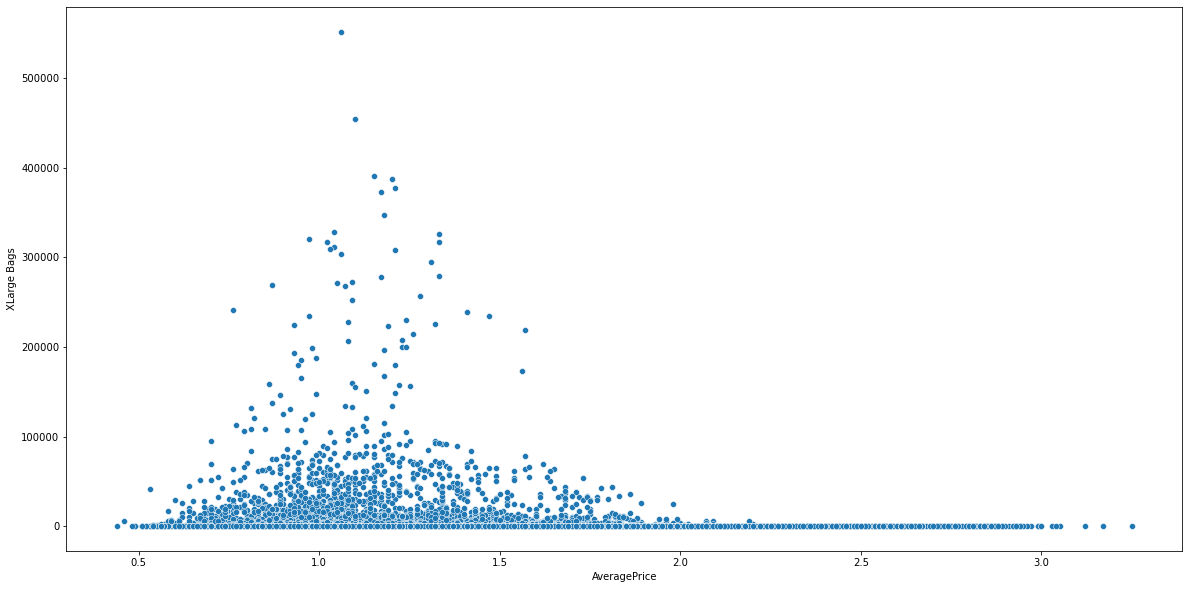

In [25]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'XLarge Bags', data = df)

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

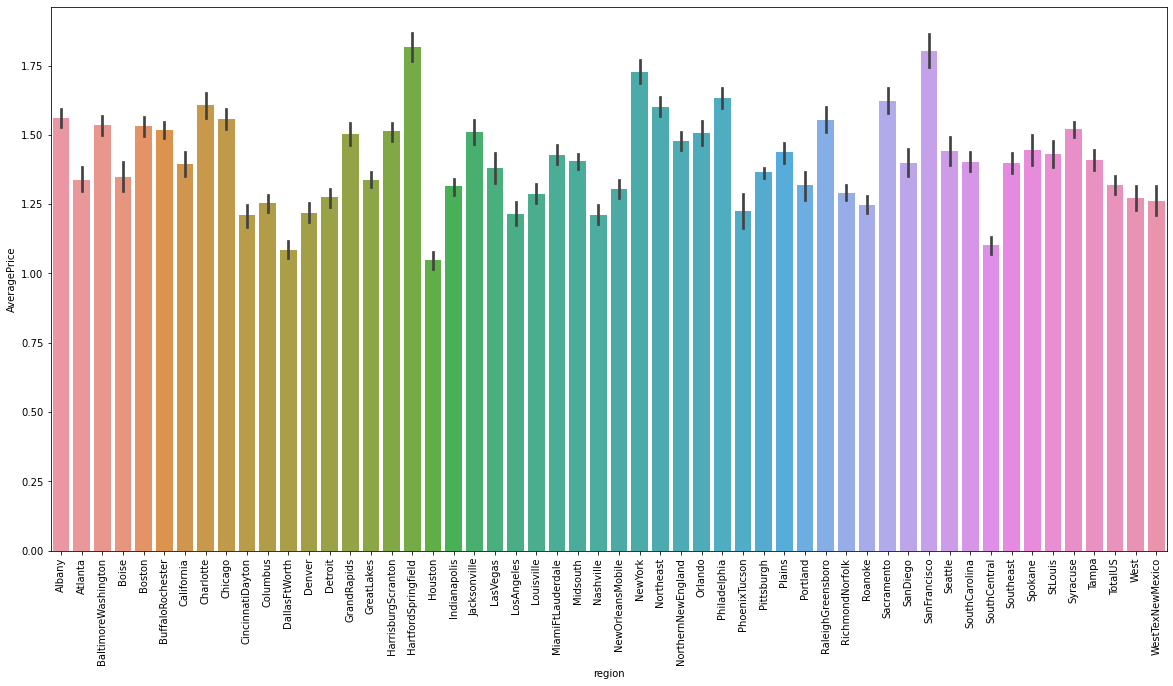

In [26]:
fig = plt.figure(figsize = (20,10))
ax=sns.barplot(x = 'region', y = 'AveragePrice', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

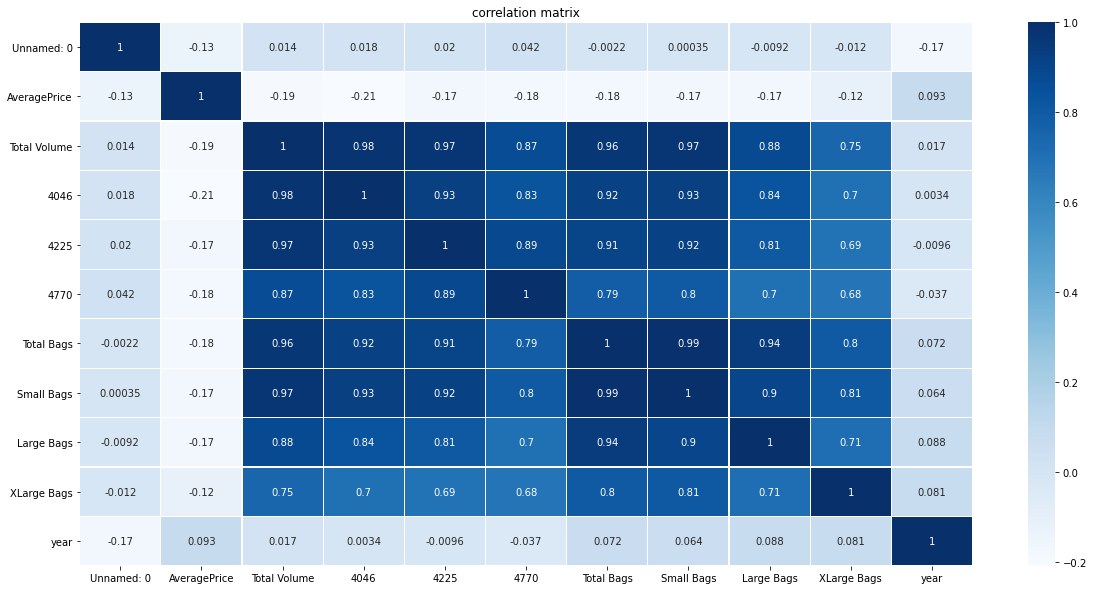

In [27]:
#To check correlation
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Observation: Averageprice is not highly  correlated with other columns

<AxesSubplot:title={'center':'Correlation with Age Graph'}>

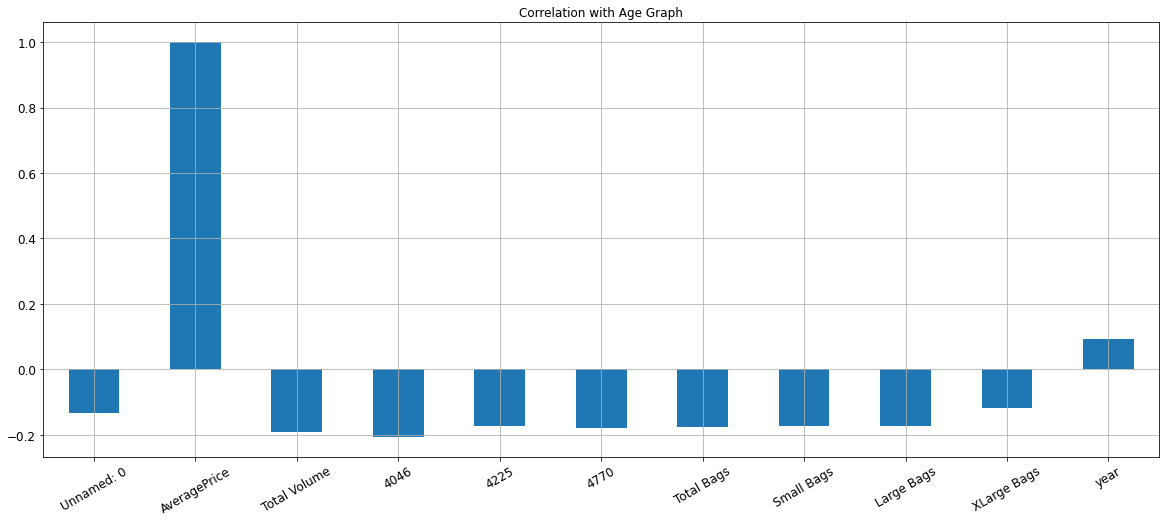

In [28]:
df.corrwith(df.AveragePrice).plot.bar(
        figsize = (20, 8), title = "Correlation with Age Graph", fontsize = 12,
        rot = 30, grid = True)

In [29]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Converted Date to ordinal for ease of prediction

In [30]:
df.dtypes

Unnamed: 0        int64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [31]:
df.drop('year', axis=1, inplace=True)

In [32]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [33]:
df.drop('type', axis=1, inplace=True)

In [34]:
#Lable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df["region"] = enc.fit_transform(df["region"].values.reshape(-1,1))


In [36]:
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0


In [37]:
df = df.sample(frac=1,random_state=0)

In [38]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
9181,3,735938,1.48,4400.25,1358.53,1735.98,0.00,1305.74,130.00,1175.74,0.00,1.0
1013,25,735784,1.05,190716.43,4890.33,119457.27,13495.86,52872.97,30631.37,21037.53,1204.07,19.0
14625,40,736043,1.27,1045450.41,105069.07,352698.21,9425.64,578257.49,252881.52,325375.97,0.00,51.0
15234,16,736582,2.15,9883.59,313.75,4230.58,0.00,5339.26,2166.91,3172.35,0.00,9.0
18247,10,736708,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,53.0


In [39]:
#checking Skewness
df.skew()

Unnamed: 0       0.108334
Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
region           0.000030
dtype: float64

In [40]:
df['Total Volume']=np.log(df['Total Volume'])

In [41]:
df['Total Volume'].skew()

0.08795448426312666

In [42]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if df[i].dtype != "object":
        if ((len(pd.unique(df[i]))) > 2):
            if abs(df.loc[:,i].skew())>0.5:
                df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [43]:
df.skew()

Unnamed: 0      0.108334
Date            0.000117
AveragePrice    0.005596
Total Volume    0.087954
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
region          0.000030
dtype: float64

To check outliers

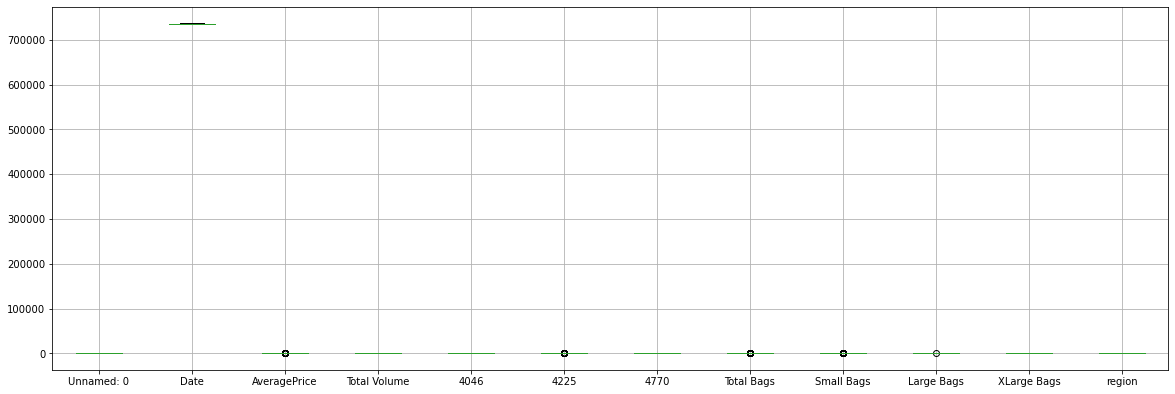

In [45]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [46]:
df.shape

(18249, 12)

0% dataloss

# Model Testing & fitting

In [47]:
#Seprate independent variable and target variable
x = df.drop("AveragePrice", axis=1)
y = df["AveragePrice"]

In [48]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new = scale.fit(x)
scale_x = new.transform(x)
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
9181,0.057692,0.285714,0.292449,0.345878,0.319172,0.000000,0.361944,0.187277,0.321398,0.000000,0.018868
1013,0.480769,0.154762,0.571369,0.418278,0.578049,0.672976,0.584446,0.490239,0.507251,0.917523,0.358491
14625,0.769231,0.375000,0.697275,0.607429,0.655997,0.649496,0.743248,0.642872,0.723293,0.000000,0.962264
15234,0.307692,0.833333,0.352332,0.267520,0.368141,0.000000,0.443443,0.328481,0.381035,0.000000,0.169811
18247,0.192308,0.940476,0.388922,0.352356,0.348570,0.477757,0.486591,0.423594,0.158459,0.000000,1.000000


After Scaling our data is in 0 to 1 range indicates its good to test

In [49]:
#Finding Best Random State
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5346300487508078  on Random_state  155


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [53]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [54]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.5346300487508078
Mean Absolute Error:      0.5505377784148608
Mean Squared error:       0.4756291778861468
Root Mean Squared Error:  0.6896587401651245
[0.49943526 0.51631025 0.50551786 0.48635225 0.50981621 0.50718864
 0.50809106 0.52894106]
cross validation score:   0.5077065735306944
Difference between R2 score and cross validatio score is -  0.026923475220113402
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9145543419

Random Forest Regressor have height Accuracy and Cross validation score i.e. 91.4%

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth': np.arange(2,20), 'max_features': ['sqrt','auto', 'log2'], 'n_estimators': [100,200,500],'criterion' :['mse','mae'] }

In [ ]:
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_

# Saving the model

In [55]:
import joblib
joblib.dump(clf.best_estimator_,"PJ1_Avacado.obj")
RF_from_joblib=joblib.load('PJ1_Avacado.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

NameError: name 'clf' is not defined